In [1]:
import os
import datetime
import pandas as pd
from matplotlib import pyplot as plt
from IPython import display, get_ipython
import numpy as np
import seaborn as sns
from scipy import spatial
import swisseph as swe
from itertools import combinations, permutations

# first set path to ephemeris files
swe.set_ephe_path('./ephe')
swe.set_sid_mode(mode=swe.SIDM_GALCENT_RGILBRAND)

In [2]:
swetest = "./swe_unix_src_2.10.03/src/swetest"
exportPath = './export/'
marketPath = './market/'
imgPath = './image/'


if not os.path.exists(exportPath):
    os.makedirs(exportPath)


In [3]:
dates_df = pd.DataFrame()

start_year = 1800
horizon = 366 * 400

base = datetime.datetime(start_year,1,1)
dates_df['timestamp'] = list(map(lambda x: base + datetime.timedelta(days=x), range(horizon)))

# dates_df = dates_df.set_index('timestamp', drop=True)



# dates_df_start_date = '1821-01-01'
# # dates_df_end_date = '1822-01-01'
# dates_df_end_date = '1821-08-21'

# dates_df_after_start_date = dates_df.index >= dates_df_start_date
# dates_df_before_end_date = dates_df.index <= dates_df_end_date
# dates_df_between_two_dates = dates_df_after_start_date & dates_df_before_end_date
# dates_df = dates_df.loc[dates_df_between_two_dates]

# print(dates_df)



def dates_to_julian(dates_df):
    col = dates_df['timestamp']   
    dates_df['jd'] = list(map(lambda x: swe.julday(int(x.strftime('%Y')),int(x.strftime('%m')),int(x.strftime('%d'))), col))
    dates_df = dates_df.set_index('timestamp', drop=True)
    return dates_df
    
    
jd_df = dates_to_julian(dates_df)

# print(jd_df)


In [4]:
center = 'geo'

# geo
planets = [
'Sun',
'Moon',
'Mercury',
'Venus',
'Mars',
'Jupiter',
'Saturn',
'Uranus',
'Neptune',
'Pluto',
    
# 'mean_Node',
# 'true_Node',
# 'mean_Apogee',
# 'osc_Apogee',
# 'intp_Apogee',
# 'intp_Perigee',
    
# 'Chiron',
# 'Pholus',
# 'Ceres',
# 'Pallas',
# 'Juno',
# 'Vesta'
]

In [5]:
def latitude(jd, center, planet):
    if center == 'geo':
        if planet == 'Sun':
            data = swe.calc_ut(jd, swe.SUN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Moon':
            data = swe.calc_ut(jd, swe.MOON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Mercury':
            data = swe.calc_ut(jd, swe.MERCURY, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Venus':
            data = swe.calc_ut(jd, swe.VENUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Mars':
            data = swe.calc_ut(jd, swe.MARS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Jupiter':
            data = swe.calc_ut(jd, swe.JUPITER, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Saturn':
            data = swe.calc_ut(jd, swe.SATURN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Uranus':
            data = swe.calc_ut(jd, swe.URANUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Neptune':
            data = swe.calc_ut(jd, swe.NEPTUNE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]          
        elif planet == 'Pluto':
            data = swe.calc_ut(jd, swe.PLUTO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  

        elif planet == 'mean_node':
            data = swe.calc_ut(jd, swe.MEAN_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]         
        elif planet == 'true_node':
            data = swe.calc_ut(jd, swe.TRUE_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]      
        elif planet == 'mean_apogee':
            data = swe.calc_ut(jd, swe.MEAN_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'osc_apogee':
            data = swe.calc_ut(jd, swe.OSCU_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]      
        elif planet == 'intp_apogee':
            data = swe.calc_ut(jd, swe.INTP_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]       
        elif planet == 'intp_perigee':
            data = swe.calc_ut(jd, swe.INTP_PERG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1] 

        elif planet == 'Chiron':
            data = swe.calc_ut(jd, swe.CHIRON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Pholus':
            data = swe.calc_ut(jd, swe.PHOLUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Ceres':
            data = swe.calc_ut(jd, swe.CERES, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Pallas':
            data = swe.calc_ut(jd, swe.PALLAS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Juno':
            data = swe.calc_ut(jd, swe.JUNO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]          
        elif planet == 'Vesta':
            data = swe.calc_ut(jd, swe.VESTA, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]      

    elif center == 'helio':
        if planet == 'Earth':
            data = swe.calc_ut(jd, swe.SUN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Moon':
            data = swe.calc_ut(jd, swe.MOON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Mercury':
            data = swe.calc_ut(jd, swe.MERCURY, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Venus':
            data = swe.calc_ut(jd, swe.VENUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Mars':
            data = swe.calc_ut(jd, swe.MARS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Jupiter':
            data = swe.calc_ut(jd, swe.JUPITER, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Saturn':
            data = swe.calc_ut(jd, swe.SATURN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Uranus':
            data = swe.calc_ut(jd, swe.URANUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Neptune':
            data = swe.calc_ut(jd, swe.NEPTUNE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]          
        elif planet == 'Pluto':
            data = swe.calc_ut(jd, swe.PLUTO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  

        elif planet == 'mean_node':
            data = swe.calc_ut(jd, swe.MEAN_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)   
            return data[0][1] 
        elif planet == 'true_node':
            data = swe.calc_ut(jd, swe.TRUE_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1] 
        elif planet == 'mean_apogee':
            data = swe.calc_ut(jd, swe.MEAN_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1] 
        elif planet == 'osc_apogee':
            data = swe.calc_ut(jd, swe.OSCU_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]    
        elif planet == 'intp_apogee':
            data = swe.calc_ut(jd, swe.INTP_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'intp_perigee':
            data = swe.calc_ut(jd, swe.INTP_PERG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]   

        elif planet == 'Chiron':
            data = swe.calc_ut(jd, swe.CHIRON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Pholus':
            data = swe.calc_ut(jd, swe.PHOLUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Ceres':
            data = swe.calc_ut(jd, swe.CERES, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Pallas':
            data = swe.calc_ut(jd, swe.PALLAS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Juno':
            data = swe.calc_ut(jd, swe.JUNO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]          
        elif planet == 'Vesta':
            data = swe.calc_ut(jd, swe.VESTA, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]         






In [6]:
def longitude(jd, center, planet):
    if center == 'geo':
        if planet == 'Sun':
            data = swe.calc_ut(jd, swe.SUN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Moon':
            data = swe.calc_ut(jd, swe.MOON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Mercury':
            data = swe.calc_ut(jd, swe.MERCURY, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Venus':
            data = swe.calc_ut(jd, swe.VENUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Mars':
            data = swe.calc_ut(jd, swe.MARS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Jupiter':
            data = swe.calc_ut(jd, swe.JUPITER, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Saturn':
            data = swe.calc_ut(jd, swe.SATURN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Uranus':
            data = swe.calc_ut(jd, swe.URANUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Neptune':
            data = swe.calc_ut(jd, swe.NEPTUNE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]          
        elif planet == 'Pluto':
            data = swe.calc_ut(jd, swe.PLUTO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        
        elif planet == 'mean_node':
            data = swe.calc_ut(jd, swe.MEAN_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]         
        elif planet == 'true_node':
            data = swe.calc_ut(jd, swe.TRUE_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]      
        elif planet == 'mean_apogee':
            data = swe.calc_ut(jd, swe.MEAN_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'osc_apogee':
            data = swe.calc_ut(jd, swe.OSCU_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]      
        elif planet == 'intp_apogee':
            data = swe.calc_ut(jd, swe.INTP_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]       
        elif planet == 'intp_perigee':
            data = swe.calc_ut(jd, swe.INTP_PERG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0] 
        
        elif planet == 'Chiron':
            data = swe.calc_ut(jd, swe.CHIRON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Pholus':
            data = swe.calc_ut(jd, swe.PHOLUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Ceres':
            data = swe.calc_ut(jd, swe.CERES, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Pallas':
            data = swe.calc_ut(jd, swe.PALLAS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Juno':
            data = swe.calc_ut(jd, swe.JUNO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]          
        elif planet == 'Vesta':
            data = swe.calc_ut(jd, swe.VESTA, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]      

    elif center == 'helio':
        if planet == 'Earth':
            data = swe.calc_ut(jd, swe.SUN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Moon':
            data = swe.calc_ut(jd, swe.MOON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Mercury':
            data = swe.calc_ut(jd, swe.MERCURY, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Venus':
            data = swe.calc_ut(jd, swe.VENUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Mars':
            data = swe.calc_ut(jd, swe.MARS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Jupiter':
            data = swe.calc_ut(jd, swe.JUPITER, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Saturn':
            data = swe.calc_ut(jd, swe.SATURN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Uranus':
            data = swe.calc_ut(jd, swe.URANUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Neptune':
            data = swe.calc_ut(jd, swe.NEPTUNE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]          
        elif planet == 'Pluto':
            data = swe.calc_ut(jd, swe.PLUTO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        
        elif planet == 'mean_node':
            data = swe.calc_ut(jd, swe.MEAN_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)   
            return data[0][0] 
        elif planet == 'true_node':
            data = swe.calc_ut(jd, swe.TRUE_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0] 
        elif planet == 'mean_apogee':
            data = swe.calc_ut(jd, swe.MEAN_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0] 
        elif planet == 'osc_apogee':
            data = swe.calc_ut(jd, swe.OSCU_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]    
        elif planet == 'intp_apogee':
            data = swe.calc_ut(jd, swe.INTP_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'intp_perigee':
            data = swe.calc_ut(jd, swe.INTP_PERG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]   
        
        elif planet == 'Chiron':
            data = swe.calc_ut(jd, swe.CHIRON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Pholus':
            data = swe.calc_ut(jd, swe.PHOLUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Ceres':
            data = swe.calc_ut(jd, swe.CERES, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Pallas':
            data = swe.calc_ut(jd, swe.PALLAS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Juno':
            data = swe.calc_ut(jd, swe.JUNO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]          
        elif planet == 'Vesta':
            data = swe.calc_ut(jd, swe.VESTA, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]         
        
      




In [7]:


df = jd_df.copy()

def planet_to_col(planet):
    df['longitude_' + planet] = list(map(lambda jd: longitude(jd, center, planet), jd_df['jd']))
    df['latitude_' + planet] = list(map(lambda jd: latitude(jd, center, planet), jd_df['jd']))

    
list(map(lambda planet: planet_to_col(planet), planets))



df = df.drop([
    'jd',
     ] , axis='columns')


print(df.columns)


def unwrap_col(col):
    # df[col] =  np.unwrap(2 * df[col]) / 2
    df[col] =  np.unwrap(df[col])
    
def unwrap_df(df):
    cols = df.columns
    list(map(lambda col: unwrap_col(col), cols))
    
# unwrap_df(df)    

# plt.plot(df)


Index(['longitude_Sun', 'latitude_Sun', 'longitude_Moon', 'latitude_Moon',
       'longitude_Mercury', 'latitude_Mercury', 'longitude_Venus',
       'latitude_Venus', 'longitude_Mars', 'latitude_Mars',
       'longitude_Jupiter', 'latitude_Jupiter', 'longitude_Saturn',
       'latitude_Saturn', 'longitude_Uranus', 'latitude_Uranus',
       'longitude_Neptune', 'latitude_Neptune', 'longitude_Pluto',
       'latitude_Pluto'],
      dtype='object')


In [8]:
aspects_df = df.filter(regex='longitude')


ss = combinations(aspects_df.columns, 2) 
  
def diff_df(s):
    p1 = s[0] 
    p2 = s[1]
    s = 'aspect-' + p1 + '-' + p2
    s = s.replace('longitude_', '')
    # print(s, p1, p2)
    df[s] =  df[p1] - df[p2]
    
list(map(lambda s: diff_df(s), list(ss)))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [9]:
df1 = pd.DataFrame()


aspects = [
    0,
    180,
    90,
    120,
    60,
    30,
    150,
    72,
    144,
    45,
    135,
    36,
    108
]


def aspect_df(aspect):
            
    def aspect_col(col, aspect):
        
        def aspect_row(row):
            if row <= aspect + 15 and row >= aspect - 15:
                row = np.cos((((row - aspect) / 360) / 10) * 360) * 10 
            else:
                row = 0    
            return row
        
        p = col.name.split("-")
        acol = str(aspect) + '_' + col.name      

        df1[acol] = col.apply(lambda row: aspect_row(row)) 

        
    cols = df.filter(regex='aspect').copy()
    list(map(lambda col: aspect_col(cols[col], aspect), cols))
    
    
def cal_aspect(aspect):
    list(map(lambda aspect: aspect_df(aspect), aspects))
    return df1


df1 = cal_aspect(aspects)  



/tmp/ipykernel_9895/1327769736.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[acol] = col.apply(lambda row: aspect_row(row))
/tmp/ipykernel_9895/1327769736.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[acol] = col.apply(lambda row: aspect_row(row))
/tmp/ipykernel_9895/1327769736.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a 

In [10]:
df1.to_csv(exportPath + '400y_aspects_df.csv', sep=',')

In [11]:

print(df1.columns)   



Index(['0_aspect-Sun-Moon', '0_aspect-Sun-Mercury', '0_aspect-Sun-Venus',
       '0_aspect-Sun-Mars', '0_aspect-Sun-Jupiter', '0_aspect-Sun-Saturn',
       '0_aspect-Sun-Uranus', '0_aspect-Sun-Neptune', '0_aspect-Sun-Pluto',
       '0_aspect-Moon-Mercury',
       ...
       '108_aspect-Jupiter-Saturn', '108_aspect-Jupiter-Uranus',
       '108_aspect-Jupiter-Neptune', '108_aspect-Jupiter-Pluto',
       '108_aspect-Saturn-Uranus', '108_aspect-Saturn-Neptune',
       '108_aspect-Saturn-Pluto', '108_aspect-Uranus-Neptune',
       '108_aspect-Uranus-Pluto', '108_aspect-Neptune-Pluto'],
      dtype='object', length=585)


In [12]:

df1 = pd.read_csv(exportPath + '400y_aspects_df.csv',parse_dates = True,index_col=0)


Index(['0_aspect-Sun-Moon', '0_aspect-Sun-Mercury', '0_aspect-Sun-Venus',
       '0_aspect-Sun-Mars', '0_aspect-Sun-Jupiter', '0_aspect-Sun-Saturn',
       '0_aspect-Sun-Uranus', '0_aspect-Sun-Neptune', '0_aspect-Sun-Pluto',
       '0_aspect-Moon-Mercury',
       ...
       '108_aspect-Jupiter-Saturn', '108_aspect-Jupiter-Uranus',
       '108_aspect-Jupiter-Neptune', '108_aspect-Jupiter-Pluto',
       '108_aspect-Saturn-Uranus', '108_aspect-Saturn-Neptune',
       '108_aspect-Saturn-Pluto', '108_aspect-Uranus-Neptune',
       '108_aspect-Uranus-Pluto', '108_aspect-Neptune-Pluto'],
      dtype='object', length=585)


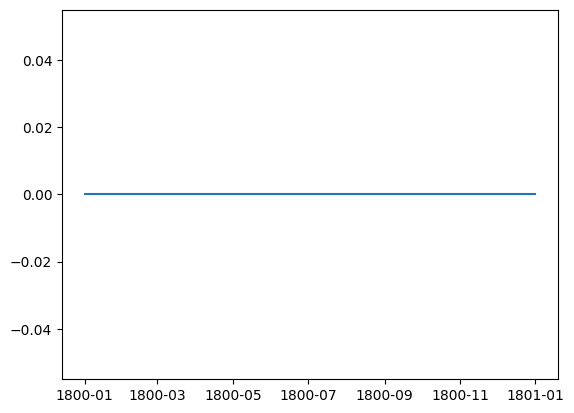

In [13]:
print(df1.columns)

plt.plot(df1['0_aspect-Saturn-Uranus'])


In [14]:
swe.close()